In [1]:
library(smoof)
library(ggplot2)
library(dplyr)
library(GA)

Warning message:
"pakiet 'smoof' został zbudowany w wersji R 4.4.2"
Ładowanie wymaganego pakietu: ParamHelpers

Warning message:
"pakiet 'ParamHelpers' został zbudowany w wersji R 4.4.2"
Ładowanie wymaganego pakietu: checkmate

Warning message:
"pakiet 'checkmate' został zbudowany w wersji R 4.4.2"
Warning message:
"pakiet 'ggplot2' został zbudowany w wersji R 4.4.2"
Warning message:
"pakiet 'dplyr' został zbudowany w wersji R 4.4.2"

Dołączanie pakietu: 'dplyr'


Następujące obiekty zostały zakryte z 'package:stats':

    filter, lag


Następujące obiekty zostały zakryte z 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"pakiet 'GA' został zbudowany w wersji R 4.4.2"
Ładowanie wymaganego pakietu: foreach

Warning message:
"pakiet 'foreach' został zbudowany w wersji R 4.4.2"
Ładowanie wymaganego pakietu: iterators

Warning message:
"pakiet 'iterators' został zbudowany w wersji R 4.4.2"
Package 'GA' version 3.2.4
Type 'citation("GA")' for citing this R packag

Deklaracja funkcji testowych

In [13]:
rosenbrock_2d <- makeRosenbrockFunction(dimensions = 2)
rosenbrock_10d <- makeRosenbrockFunction(dimensions = 10)
rosenbrock_20d <- makeRosenbrockFunction(dimensions = 20)

rastrigin_2d <- makeRastriginFunction(dimensions = 2)
rastrigin_10d <- makeRastriginFunction(dimensions = 10)
rastrigin_20d <- makeRastriginFunction(dimensions = 20)

NO_STARTS <- 50
set.seed(42)

get_domain <- function(fun) {
  list(
    lower = getLowerBoxConstraints(fun),
    upper = getUpperBoxConstraints(fun)
  )
}

domains <- list(
  rosenbrock_2d = get_domain(rosenbrock_2d),
  rosenbrock_10d = get_domain(rosenbrock_10d),
  rosenbrock_20d = get_domain(rosenbrock_20d),
  rastrigin_2d = get_domain(rastrigin_2d),
  rastrigin_10d = get_domain(rastrigin_10d),
  rastrigin_20d = get_domain(rastrigin_20d)
)

print(domains)

$rosenbrock_2d
$rosenbrock_2d$lower
x1 x2 
-5 -5 

$rosenbrock_2d$upper
x1 x2 
10 10 


$rosenbrock_10d
$rosenbrock_10d$lower
 x1  x2  x3  x4  x5  x6  x7  x8  x9 x10 
 -5  -5  -5  -5  -5  -5  -5  -5  -5  -5 

$rosenbrock_10d$upper
 x1  x2  x3  x4  x5  x6  x7  x8  x9 x10 
 10  10  10  10  10  10  10  10  10  10 


$rosenbrock_20d
$rosenbrock_20d$lower
 x1  x2  x3  x4  x5  x6  x7  x8  x9 x10 x11 x12 x13 x14 x15 x16 x17 x18 x19 x20 
 -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5 

$rosenbrock_20d$upper
 x1  x2  x3  x4  x5  x6  x7  x8  x9 x10 x11 x12 x13 x14 x15 x16 x17 x18 x19 x20 
 10  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10 


$rastrigin_2d
$rastrigin_2d$lower
   x1    x2 
-5.12 -5.12 

$rastrigin_2d$upper
  x1   x2 
5.12 5.12 


$rastrigin_10d
$rastrigin_10d$lower
   x1    x2    x3    x4    x5    x6    x7    x8    x9   x10 
-5.12 -5.12 -5.12 -5.12 -5.12 -5.12 -5.12 -5.12 -5.12 -5.12 

$rastrigin_10d$upper
  x1   x2   x

Funkcja ms_run znajduje minimum funcji za pomocą algorytmu MS

In [3]:
# ms_run <- function(fun, domain, starts) {
#   total_evals <- 0
#   best_value <- Inf
  
#   for (i in 1:starts) {
#     x0 <- runif(length(domain$lower), domain$lower, domain$upper)
    
#     result <- optim(x0, fun, method = "L-BFGS-B", lower = domain$lower, upper = domain$upper)
    
#     total_evals <- total_evals + result$counts[["function"]]
#     if (result$value < best_value) best_value <- result$value
#   }
  
#   list(best = best_value, evals = total_evals)
# }

Funkcja ga_run znajduje minimum funcji za pomocą algorytmu GA ( biblioteka GA )

In [4]:
ga_run <- function(fun, domain, budget) {
  ga_result <- ga(
    type = "real-valued",
    fitness = function(x) -fun(x),
    lower = domain$lower,
    upper = domain$upper,
    popSize = 50,
    maxiter = budget,
    run = 20,             # Stop if the best solution doesn't improve for 20 generations
    monitor = FALSE
  )
  
  return(-ga_result@fitnessValue)  # GA maximizes, so return the negative value
}

algorytm prs

In [5]:
prs_run <- function(fun, domain, budget) {
  best_value <- Inf
  
  for (i in 1:budget) {
    x0 <- runif(length(domain$lower), domain$lower, domain$upper)
    result <- fun(x0)
    best_value <- min(best_value, result)
  }
  
  return(best_value)
}

Wykonanie pomiarów

In [6]:
run_experiments <- function(fun, domain, algorithm, budget, starts = NO_STARTS) {
  if (algorithm == "MS") {
    replicate(50, ms_run(fun, domain, starts)$best)
  } else if (algorithm == "GA") {
    replicate(50, ga_run(fun, domain, budget))
  } else if (algorithm == "PRS") {
    replicate(50, prs_run(fun, domain, budget))
  }
}

experiments <- list(
  rosenbrock_2d = list(fun = rosenbrock_2d, domain = domains$rosenbrock_2d),
  rosenbrock_10d = list(fun = rosenbrock_10d, domain = domains$rosenbrock_10d),
  rosenbrock_20d = list(fun = rosenbrock_20d, domain = domains$rosenbrock_20d),
  rastrigin_2d = list(fun = rastrigin_2d, domain = domains$rastrigin_2d),
  rastrigin_10d = list(fun = rastrigin_10d, domain = domains$rastrigin_10d),
  rastrigin_20d = list(fun = rastrigin_20d, domain = domains$rastrigin_20d)
)

ga_results <- lapply(seq_along(experiments), function(i) {
  run_experiments(experiments[[i]]$fun, experiments[[i]]$domain, "GA", budget = 1000)
})

prs_results <- lapply(seq_along(experiments), function(i) {
  run_experiments(experiments[[i]]$fun, experiments[[i]]$domain, "PRS", budget = 1000)
})

results <- data.frame(
  Function = rep(names(experiments), each = 50),
  Algorithm = rep(c("PRS", "GA"), each = 50 * length(experiments)),
  Value = c(unlist(prs_results), unlist(ga_results))
)

print(results)

          Function Algorithm        Value
1    rosenbrock_2d       PRS 9.881513e-01
2    rosenbrock_2d       PRS 1.693598e-01
3    rosenbrock_2d       PRS 4.167135e-01
4    rosenbrock_2d       PRS 8.358815e-01
5    rosenbrock_2d       PRS 9.349126e-01
6    rosenbrock_2d       PRS 2.519220e+00
7    rosenbrock_2d       PRS 4.007618e-01
8    rosenbrock_2d       PRS 5.633791e-01
9    rosenbrock_2d       PRS 1.041423e+00
10   rosenbrock_2d       PRS 1.810152e-01
11   rosenbrock_2d       PRS 3.794722e-02
12   rosenbrock_2d       PRS 3.091512e-03
13   rosenbrock_2d       PRS 2.255308e-02
14   rosenbrock_2d       PRS 2.186002e-02
15   rosenbrock_2d       PRS 6.611732e-02
16   rosenbrock_2d       PRS 5.772517e-01
17   rosenbrock_2d       PRS 3.045121e-01
18   rosenbrock_2d       PRS 1.100637e+00
19   rosenbrock_2d       PRS 6.730725e-02
20   rosenbrock_2d       PRS 6.616047e-02
21   rosenbrock_2d       PRS 1.574410e-01
22   rosenbrock_2d       PRS 7.646595e-02
23   rosenbrock_2d       PRS 9.871

Zapis do CSV

In [7]:
# PRS
for (i in seq_along(prs_results)) {
    data <- unlist(prs_results[i])

    file_name <- paste0("./data/", names(experiments[i]),"PRS", ".csv")
    
    write.csv(data, file = file_name, row.names = FALSE)
}

# GA
for (i in seq_along(ga_results)) {
    data <- unlist(ga_results[i])

    file_name <- paste0("./data/", names(experiments[i]),"GA", ".csv")
    
    write.csv(data, file = file_name, row.names = FALSE)
}
# full res
write.csv(results, file = "./data/results", row.names = FALSE)

Wykresy

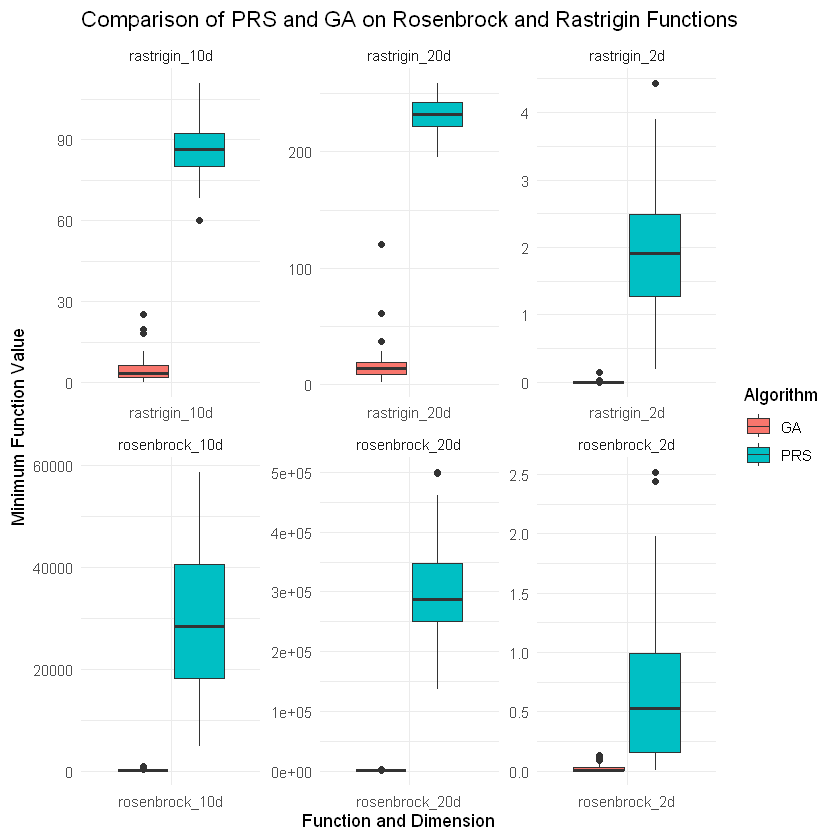

In [8]:
ggplot(results, aes(x = Function, y = Value, fill = Algorithm)) +
  geom_boxplot() +
  facet_wrap(~Function, scales = "free") +
  labs(title = "Comparison of PRS and GA on Rosenbrock and Rastrigin Functions",
       y = "Minimum Function Value",
       x = "Function and Dimension") +
  theme_minimal()

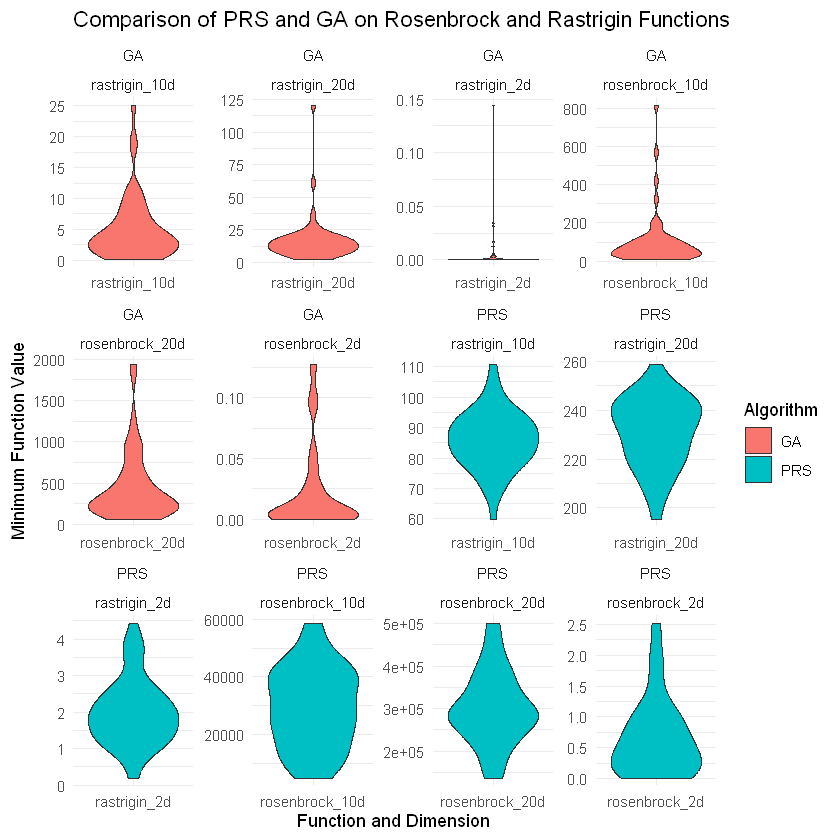

In [9]:
ggplot(results, aes(x = Function, y = Value, fill = Algorithm)) +
  geom_violin() +
  facet_wrap(~Algorithm + Function, scales = "free") +
  labs(title = "Comparison of PRS and GA on Rosenbrock and Rastrigin Functions",
       y = "Minimum Function Value",
       x = "Function and Dimension") +
  theme_minimal()

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


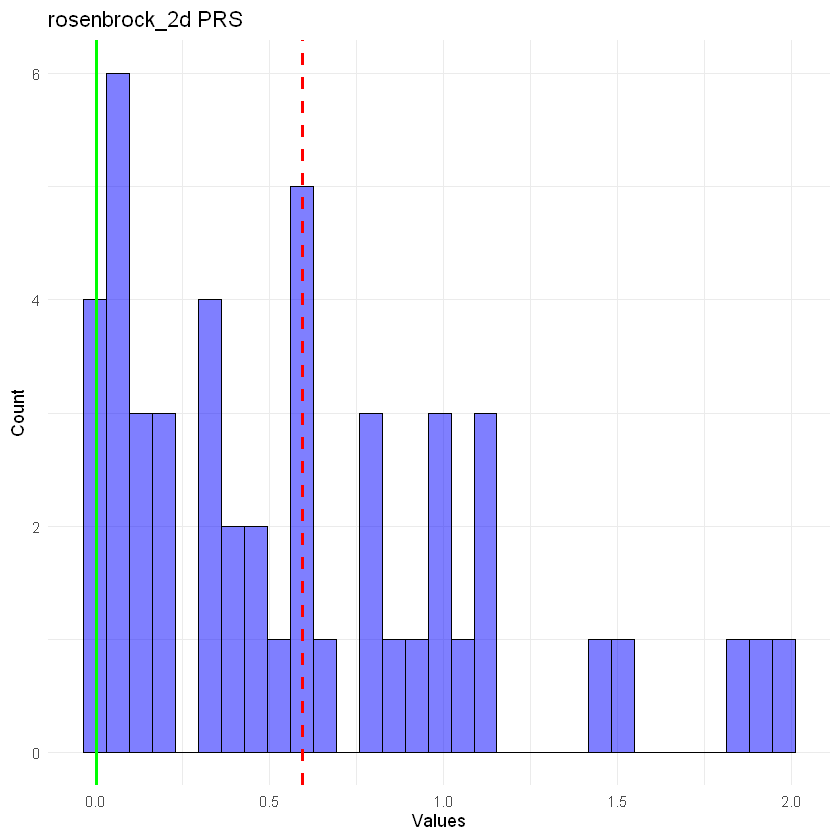

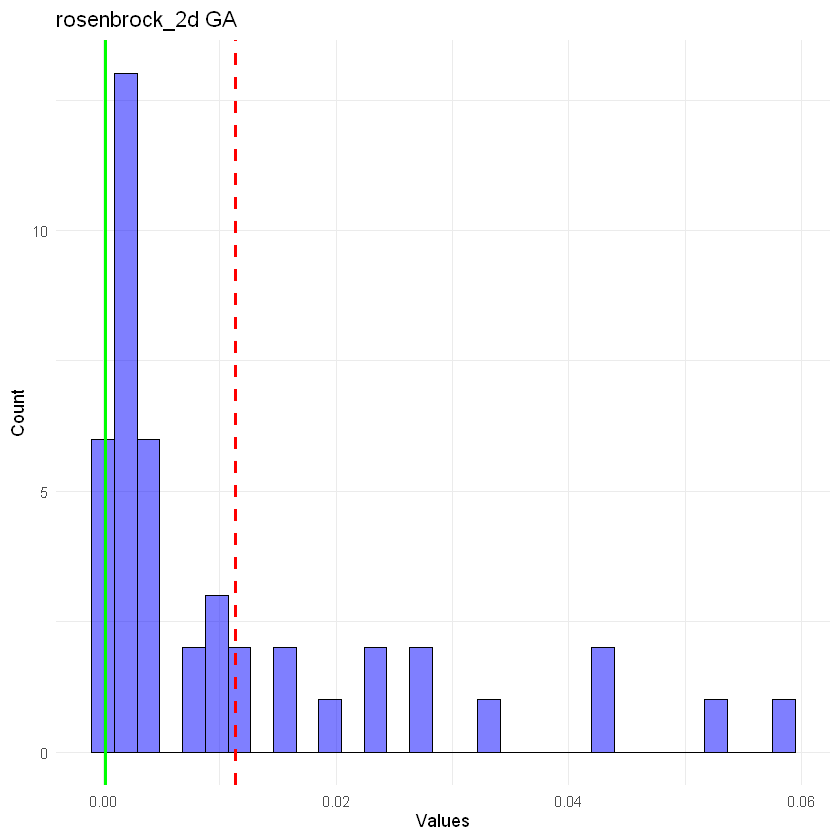

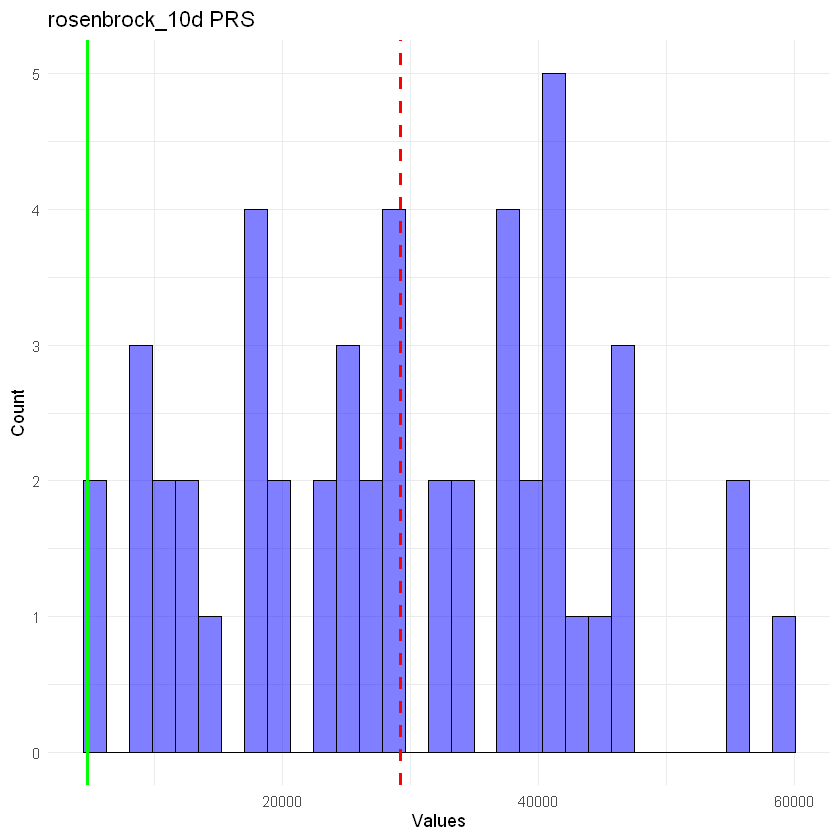

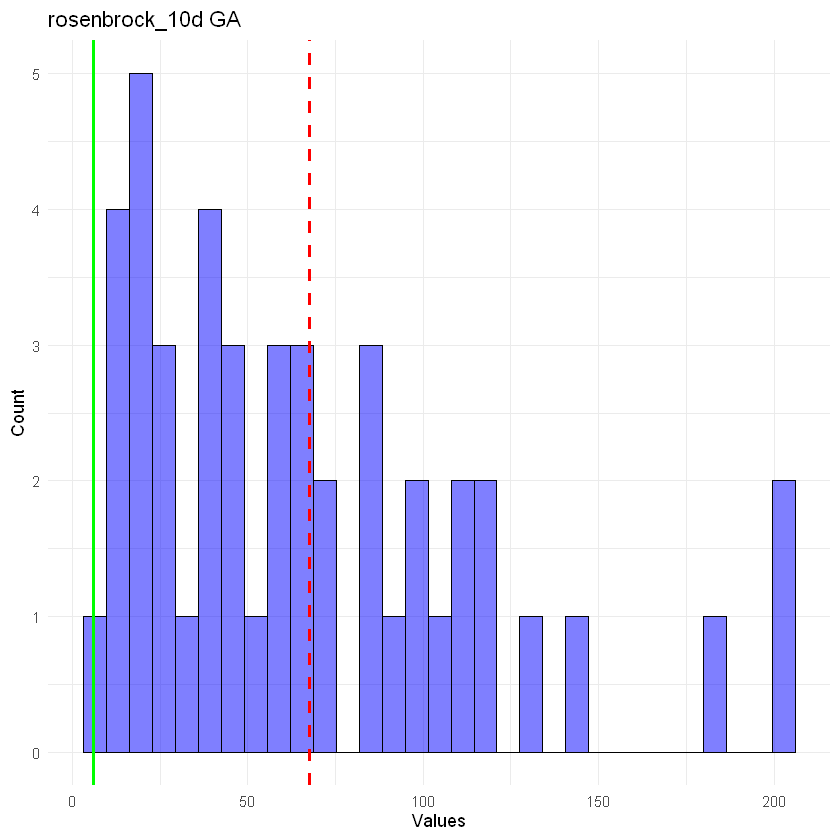

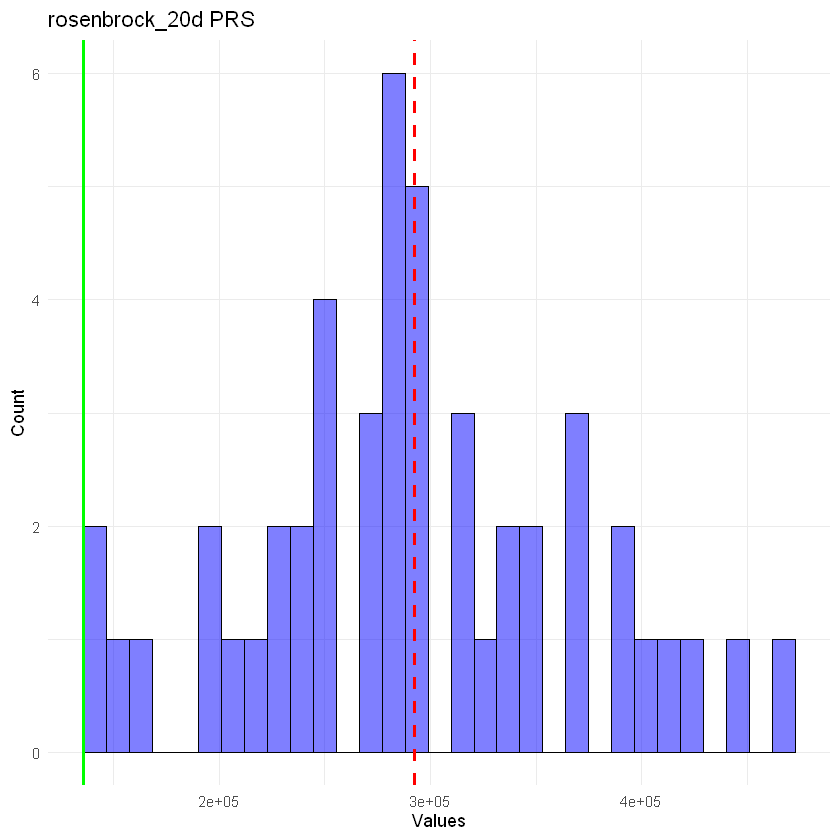

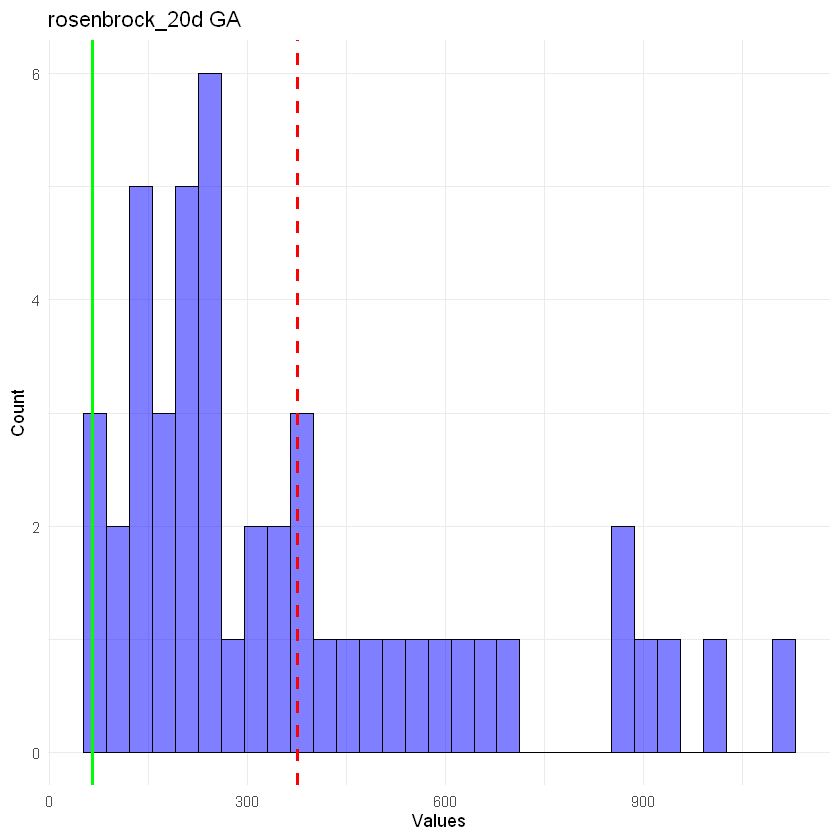

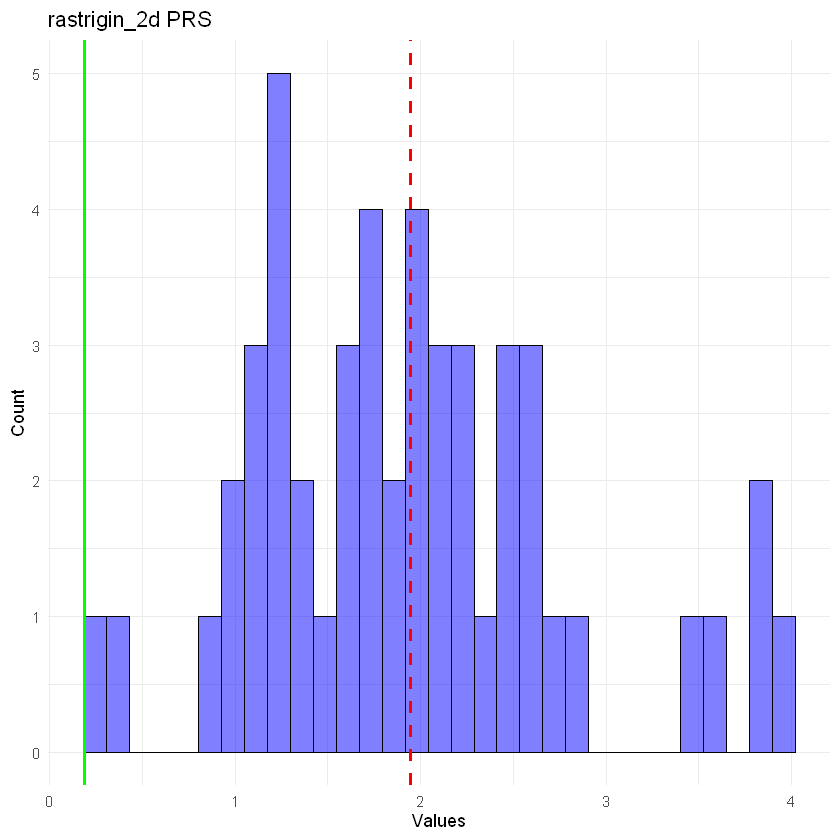

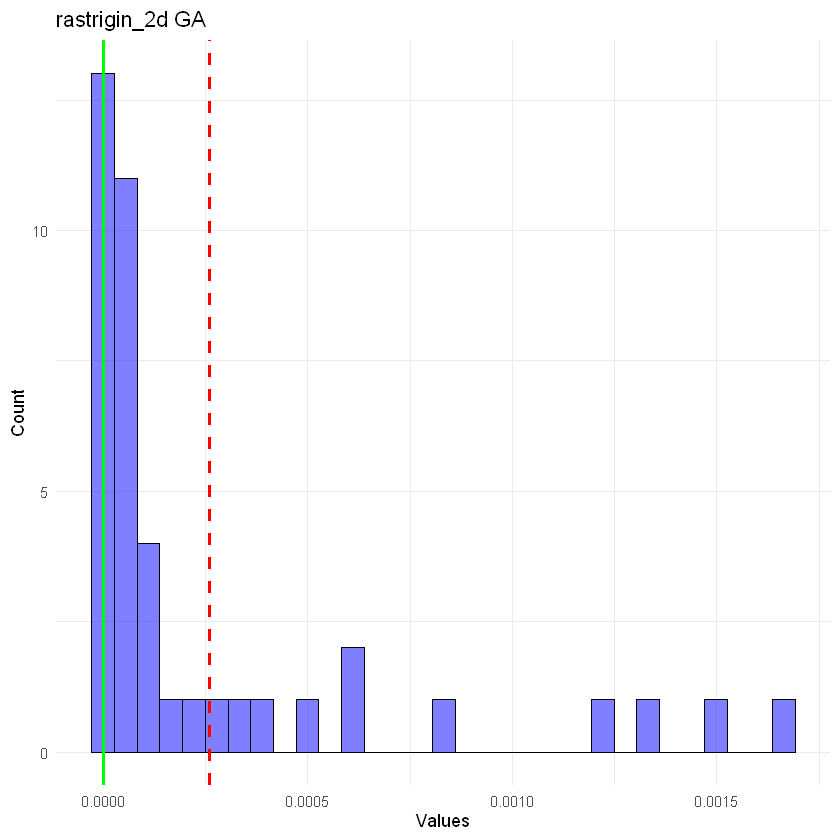

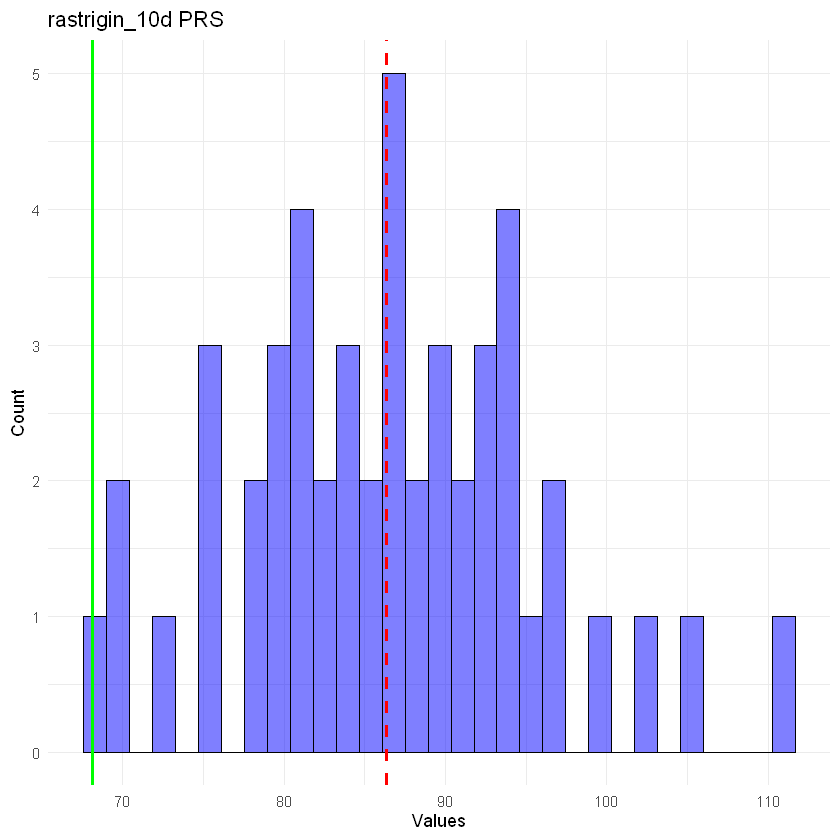

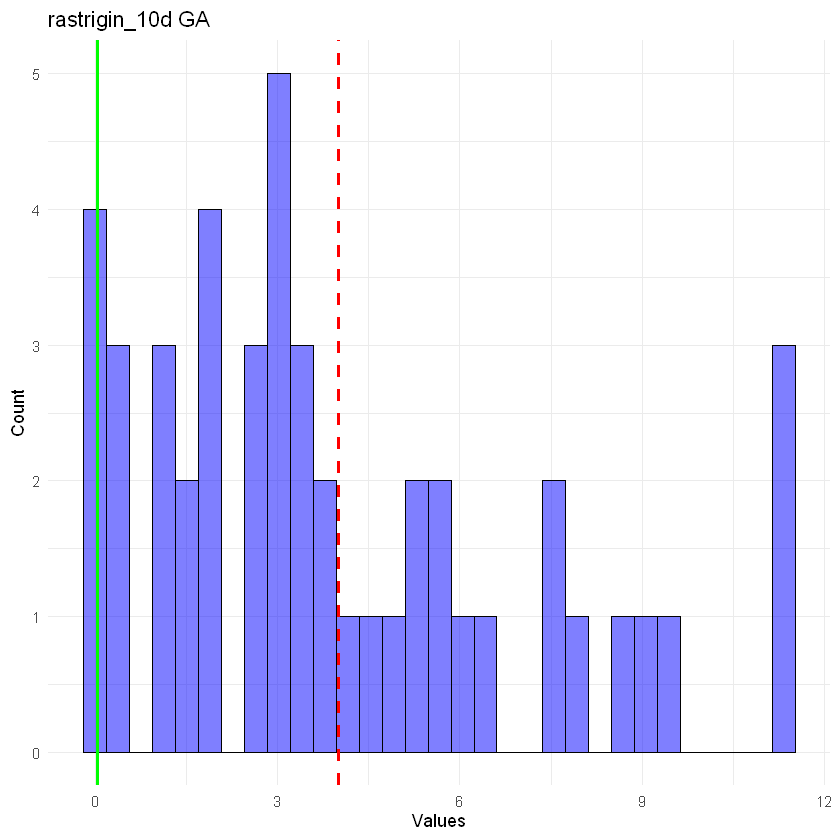

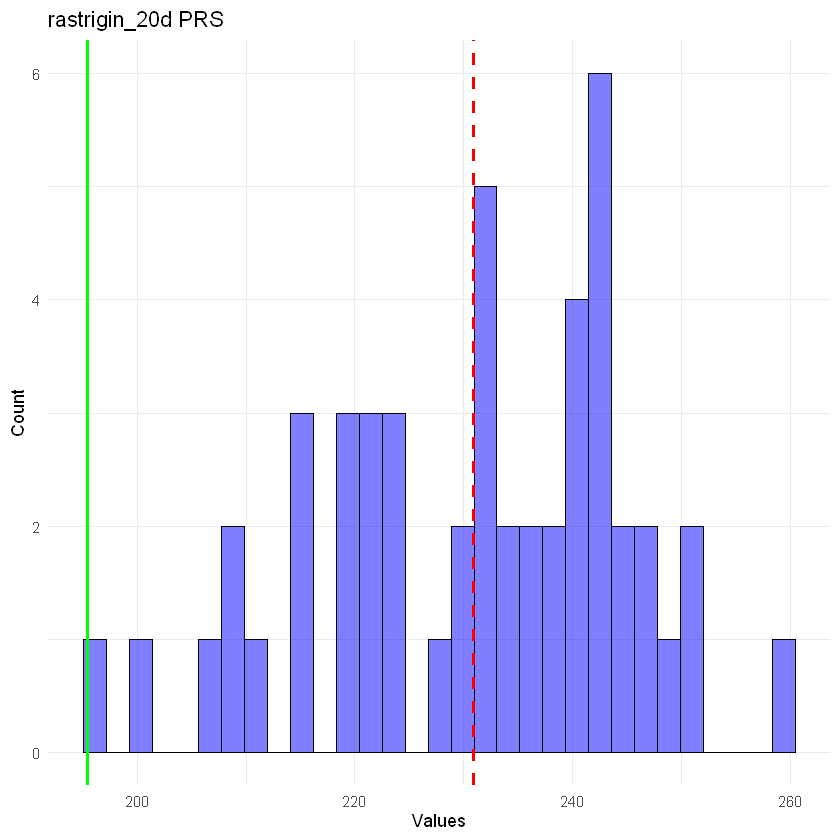

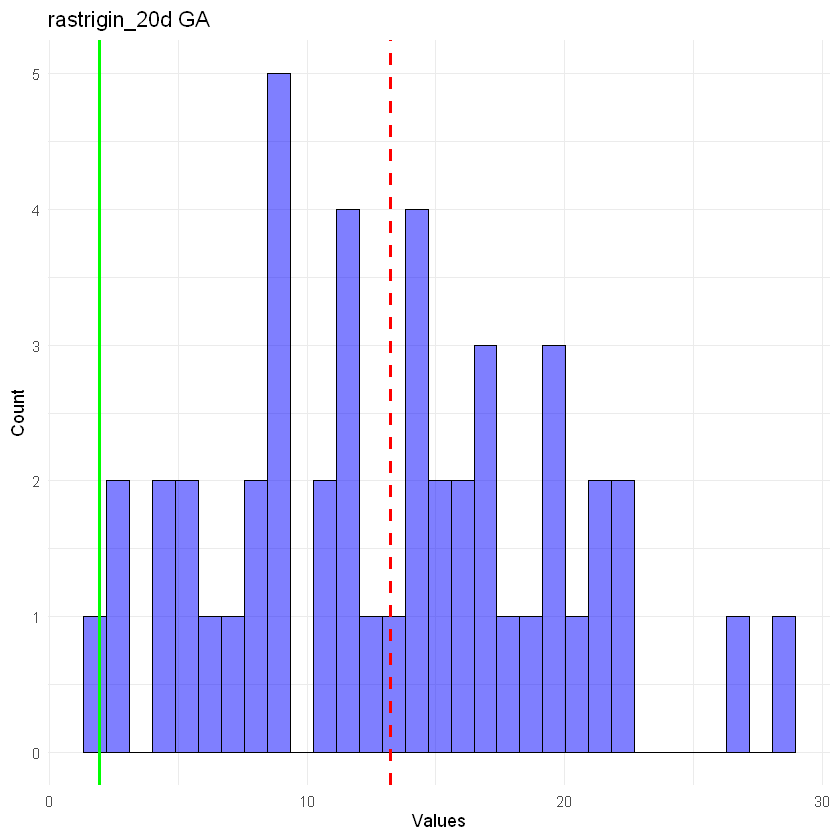

In [10]:
generate_plot <- function(data, function_name, algorithm_name) {
  subset_data <- data %>%
    filter(Function == function_name, Algorithm == algorithm_name)
  
  subset_data <- subset_data %>%
    filter(!is.na(Value) & is.finite(Value))

  median_value <- median(subset_data$Value, na.rm = TRUE)
  iqr_value <- IQR(subset_data$Value, na.rm = TRUE)

  upper_quantile <- quantile(subset_data$Value, 0.75, na.rm = TRUE)
  lower_quantile <- quantile(subset_data$Value, 0.25, na.rm = TRUE)
  
  subset_data <- subset_data %>%
    filter(Value >= (lower_quantile - 1.5 * iqr_value) & Value <= (upper_quantile + 1.5 * iqr_value))
  
  bin_width <- diff(range(subset_data$Value)) / 30
  
  ggplot(subset_data, aes(x = Value)) +
    geom_histogram(binwidth = bin_width, fill = "blue", color = "black", alpha = 0.5) +
    geom_vline(aes(xintercept = min(Value, na.rm = TRUE)), color = "green", size = 1) +
    geom_vline(aes(xintercept = mean(Value, na.rm = TRUE)), color = "red", linetype = "dashed", size = 1) +
    labs(
      title = paste(function_name, algorithm_name),
      x = "Values",
      y = "Count"
    ) +
    theme_minimal()
}

for (function_name in c("rosenbrock_2d", "rosenbrock_10d", "rosenbrock_20d", "rastrigin_2d", "rastrigin_10d", "rastrigin_20d")) {
  for (algorithm_name in c("PRS", "GA")) {
    # print(paste("Generating plot for", function_name, algorithm_name))
    plot <- generate_plot(results, function_name, algorithm_name)
    if (!is.null(plot)) print(plot)
  }
}


In [11]:
statistical_analysis <- function(results) {
  results %>%
    group_by(Function, Algorithm) %>%
    summarise(Mean = mean(Value), SD = sd(Value)) %>%
    ungroup()
}

t_tests <- lapply(names(experiments), function(fun) {
  ms_values <- results %>% filter(Function == fun & Algorithm == "PRS") %>% pull(Value)
  ga_values <- results %>% filter(Function == fun & Algorithm == "GA") %>% pull(Value)
  t.test(ms_values, ga_values)
})

t_tests

[[1]]

	Welch Two Sample t-test

data:  ms_values and ga_values
t = 7.1702, df = 49.291, p-value = 3.505e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.4666912 0.8300797
sample estimates:
 mean of x  mean of y 
0.67129131 0.02290584 


[[2]]

	Welch Two Sample t-test

data:  ms_values and ga_values
t = 14.751, df = 49.011, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 25174.05 33115.17
sample estimates:
 mean of x  mean of y 
29249.3366   104.7265 


[[3]]

	Welch Two Sample t-test

data:  ms_values and ga_values
t = 24.53, df = 49.002, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 275637.3 324829.5
sample estimates:
  mean of x   mean of y 
300687.3003    453.9327 


[[4]]

	Welch Two Sample t-test

data:  ms_values and ga_values
t = 15.42, df = 49.053, p-value < 2.2e-16
alternative hy